<a href="https://colab.research.google.com/github/morreh89/Carrefour-Kenya-unsupervised-learning-techniques/blob/main/Part_1%262_Dimensionality_Reduction_%26_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import required librbries**

In [209]:
#Increase columns and rows from default cols=20 and rows=60
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

# **Overview of problem**

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

In [210]:
# loading dataset
ds1 <- read.csv("Supermarket_1and2.csv")
head(ds1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [211]:
# getting the shape of our dataset
dim(ds1)

[1] 1000   16

In [212]:
# getting basic information about our dataset
str(ds1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

"Invoice.ID" does not seem to be relevant to our problem so we will drop it. As for "Date" and "Time", we will split them into day, month, and year, and hour and minute respectively.

In [213]:
# dropping the "Invoice.ID" column
ds1$Invoice.ID <- NULL


We are now up to 18 variables, but the number of records hasn't changed.

In [214]:
# checking for duplicated records
anyDuplicated(ds1)

[1] 0

we have no duplicates

In [215]:
# checking for missing values
colSums(is.na(ds1))

Branch           Customer.type                  Gender 
                      0                       0                       0 
           Product.line              Unit.price                Quantity 
                      0                       0                       0 
                    Tax                    Date                    Time 
                      0                       0                       0 
                Payment                    cogs gross.margin.percentage 
                      0                       0                       0 
           gross.income                  Rating                   Total 
                      0                       0                       0

There are no missing values

In [216]:
# Convert data types using as.integer
# Branch
df_dim_fet <- ds1

df_dim_fet$Branch_Enc<-as.integer(as.factor(df_dim_fet$Branch))
# Customer Type
df_dim_fet$Customer_Type_Enc<-as.integer(as.factor(df_dim_fet$Customer.type))
# Gender
df_dim_fet$Gender_Enc<-as.integer(as.factor(df_dim_fet$Gender))
# Product.line
df_dim_fet$Product_Line_Enc<-as.integer(as.factor(df_dim_fet$Product.line))
#Payment
df_dim_fet$Payment_Enc<-as.integer(as.factor(df_dim_fet$Payment))

In [217]:
# Split date year, month and day.
# Convert to date datatype first then split thereafter
df_dim_fet$Date <- as.Date(df_dim_fet$Date, "%m/%d/%Y")
df_dim_fet$year <- year(ymd(df_dim_fet$Date))
df_dim_fet$month <- month(ymd(df_dim_fet$Date)) 
df_dim_fet$day <- day(ymd(df_dim_fet$Date))

In [218]:
# Convert date to time
df_dim_fet$hour = format(strptime(df_dim_fet$Time,"%H:%M"),'%H')
df_dim_fet$minute = format(strptime(df_dim_fet$Time,"%H:%M"),'%M')

In [219]:
head(df_dim_fet)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Branch_Enc,Customer_Type_Enc,Gender_Enc,Product_Line_Enc,Payment_Enc,year,month,day,hour,minute
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,1,1,1,4,3,2019,1,5,13,08
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200,3,2,1,1,1,2019,3,8,10,29
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255,1,2,2,5,2,2019,3,3,13,23
4,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,1,1,2,4,3,2019,1,27,20,33
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,1,2,2,6,3,2019,2,8,10,37
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,3,2,2,1,3,2019,3,25,18,30


#### Selecting numerical/Integer columns only

In [220]:
df_dim_fet_num <- select_if(df_dim_fet,is.numeric)
str(df_dim_fet_num)

'data.frame':	1000 obs. of  16 variables:
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Branch_Enc             : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer_Type_Enc      : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender_Enc             : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product_Line_Enc       : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Payment_Enc            : int  3 1 2 3 3 3 3 3 2 2 ...
 $ year                   : num  2019 2019 2019 2019 2019 ...
 $ month                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ day                    : int  5 8 

## Part 1: Dimensionality Reduction
This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.

### 1.1 Principal Component Analysis (PCA)

In [221]:
# Identify the columns with zero column variance.
names(df_dim_fet_num[, sapply(df_dim_fet_num, function(v) var(v, na.rm=TRUE)==0)])

[1] "gross.margin.percentage" "year"

In [222]:
# Drop the columns as they result to error "stop("cannot rescale a constant/zero column to unit variance")"
df_dim_fet_num <- subset(df_dim_fet_num, select = -c(gross.margin.percentage, year))

In [223]:
dim(df_dim_fet_num)

[1] 1000   14

In [224]:
# now carrying out PCA with center and scale set to true
df_num.pca <- prcomp(df_dim_fet_num, center = TRUE, scale. = TRUE)

# previewing our PCA summary
summary(df_num.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2203 1.08227 1.06969 1.02580 1.00895 0.99359 0.97647
Proportion of Variance 0.3521 0.08367 0.08173 0.07516 0.07271 0.07052 0.06811
Cumulative Proportion  0.3521 0.43578 0.51751 0.59267 0.66538 0.73590 0.80401
                           PC8     PC9   PC10    PC11      PC12      PC13
Standard deviation     0.96596 0.94903 0.9057 0.29961 2.109e-16 9.849e-17
Proportion of Variance 0.06665 0.06433 0.0586 0.00641 0.000e+00 0.000e+00
Cumulative Proportion  0.87066 0.93499 0.9936 1.00000 1.000e+00 1.000e+00
                            PC14
Standard deviation     6.024e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

We obtained 14 principal components where each explains a percentage of the total 
variation in the dataset. PC1 explains 35% of the total variance, which means that 
nearly one-third of the information in the dataset (14 variables) can be explained by 
PC1.
PC1 to PC10 explains 99% of the variance.

In [225]:
str(df_num.pca)

List of 5
 $ sdev    : num [1:14] 2.22 1.08 1.07 1.03 1.01 ...
 $ rotation: num [1:14, 1:14] -0.291 -0.324 -0.449 -0.449 -0.449 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:14] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:14] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:14] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:14] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:14] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:14] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:14] -2.03 2.291 -0.118 -1.471 -2.745 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1000] "1" "2" "3" "4" ...
  .. ..$ : chr [1:14] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


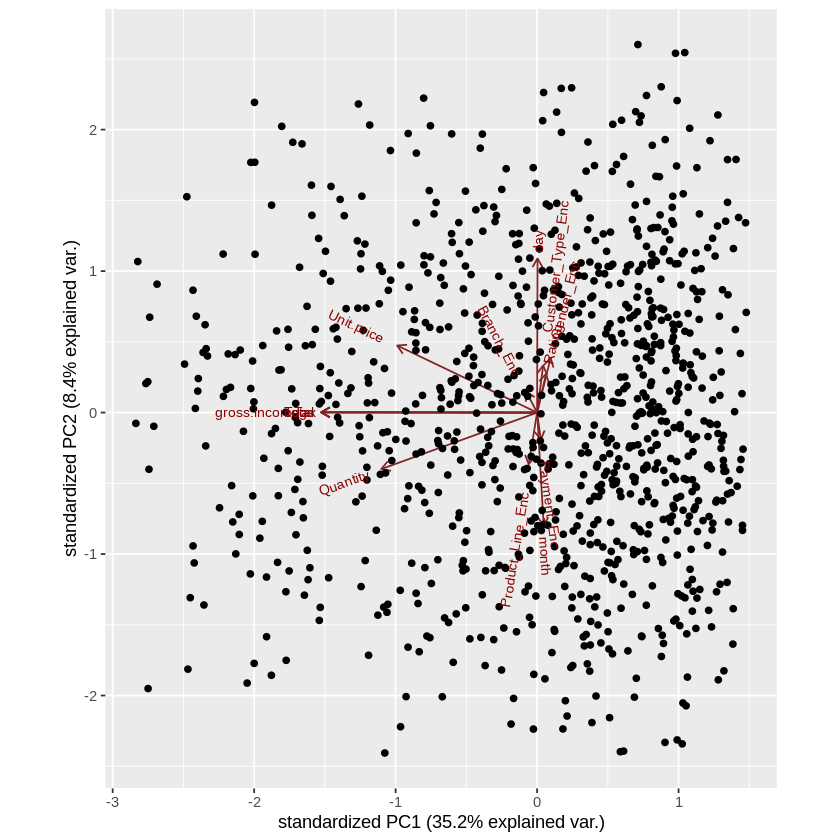

In [226]:
library(ggbiplot)
ggbiplot(df_num.pca)

From above graph, Gender, customertype, payment, month contribute highly to Principal Component 1.


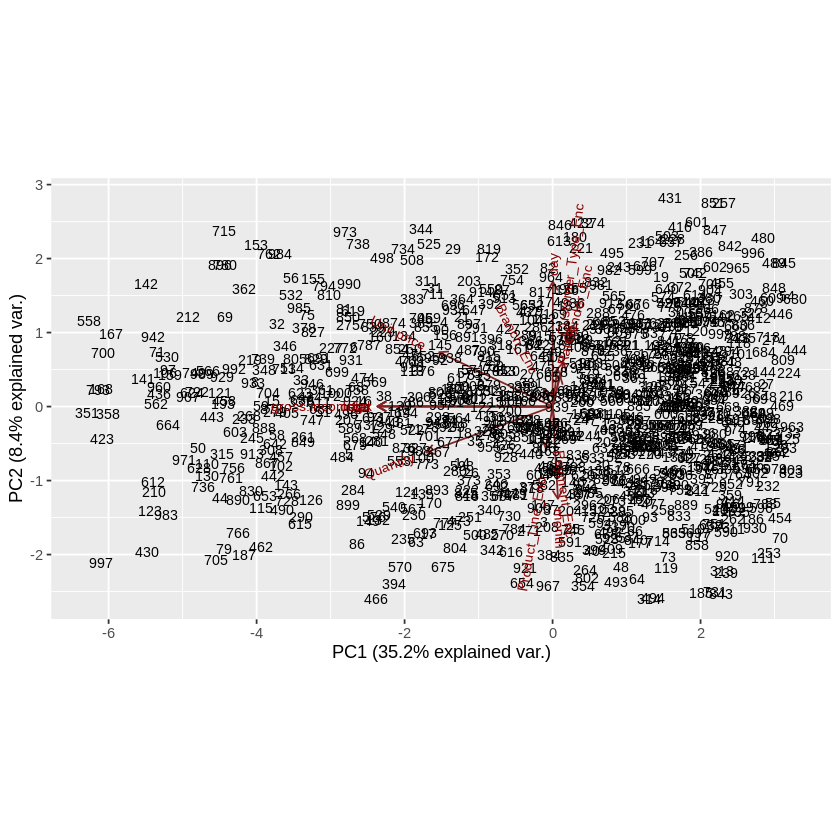

In [227]:
# adding more detail to the plot
ggbiplot(df_num.pca, labels = rownames(df_num), obs.scale = 1, var.scale = 1)

**Interpretation**

PCA 1 to 10 are able to explain the variance in the data as they represent 99.36 of the variance. The other PC11 to 14 should be dropped.

To complete further classification, data values impact on principal components should be explored to identify the clusters

## Run Stochastic Neighbour Embedding(t-SNE)





In [228]:
tsne <- Rtsne(df_dim_fet_num, dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 1000 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.12 seconds (sparsity = 0.101248)!
Learning embedding...
Iteration 50: error is 59.366344 (50 iterations in 0.14 seconds)
Iteration 100: error is 51.756387 (50 iterations in 0.13 seconds)
Iteration 150: error is 50.563190 (50 iterations in 0.13 seconds)
Iteration 200: error is 50.197327 (50 iterations in 0.13 seconds)
Iteration 250: error is 50.050307 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.640820 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.467455 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.413975 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.391083 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.378894 (50 iterations in 0.13 seconds)
Fitting performed in 1.30 seconds.


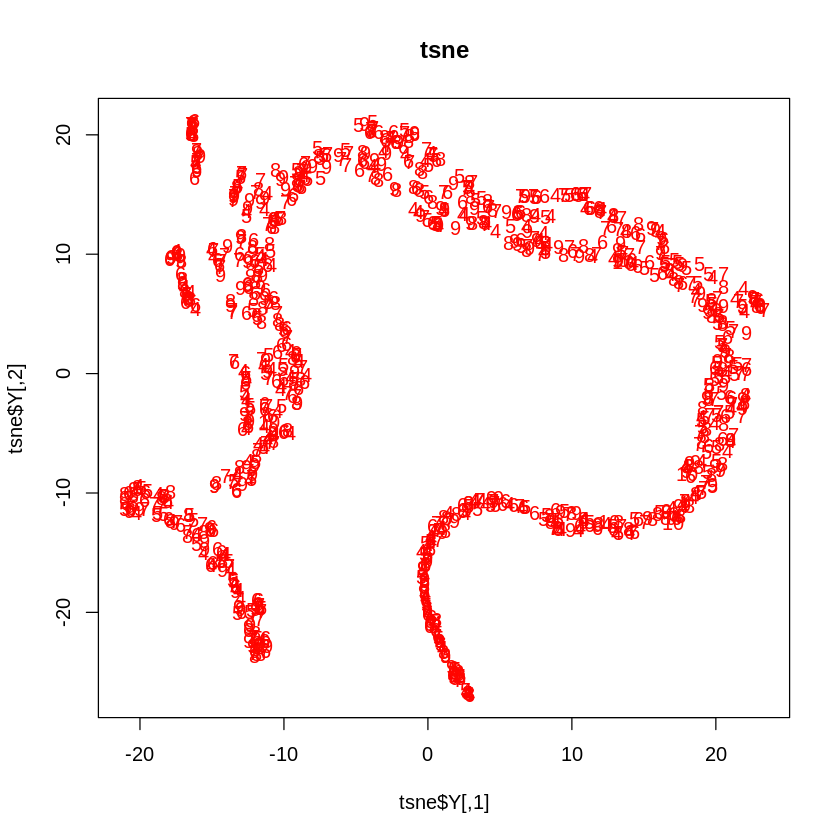

In [229]:
df_dim_fet_num$Rating_num = as.integer(df_dim_fet_num$Rating)

# Curating the database for analysis 
# 
Labels<-df_dim_fet_num$Rating_num
df_dim_fet_num$Rating_num<-as.factor(df_dim_fet_num$Rating_num)

# For plotting
colors = rainbow(length(df_dim_fet_num$Rating_num))
names(colors) = unique(df_dim_fet_num$Rating_num)

plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=df_dim_fet_num$Rating_num, col=colors[df_dim_fet_num$Rating_num])

## Part 2: Feature Selection
This section requires you to perform feature selection through the use of the unsupervised learning methods learned earlier this week. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

### 2.1 Filter Method

In [230]:
library(caret)
library(corrplot)
library(lattice)

In [231]:
# finding correlations
correlationMatrix <- cor(df_num)
correlationMatrix

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
Branch,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Customer.type,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Gender,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Product.line,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Unit.price,NA,NA,NA,NA,1.000000000,0.010777564,0.63396209,NA,0.63396209,0.63396209,-0.008777507,0.63396209,0.057020896,-0.027387186,0.008242210,-0.006868818
Quantity,NA,NA,NA,NA,0.010777564,1.000000000,0.70551019,NA,0.70551019,0.70551019,-0.015814905,0.70551019,-0.043346859,-0.014524276,-0.007316886,-0.014928556
Tax,NA,NA,NA,NA,0.633962089,0.705510186,1.00000000,NA,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
Payment,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA
cogs,NA,NA,NA,NA,0.633962089,0.705510186,1.00000000,NA,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
gross.income,NA,NA,NA,NA,0.633962089,0.705510186,1.00000000,NA,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899


In [232]:
# getting the highly correlated variables
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff = 0.75)
names(df_num[,highlyCorrelated])


[1] "Tax"          "cogs"         "gross.income"

Here we see that the following below are highly correlated with each other. We will now manually remove them.

*   cogs
*   total
*   tax



In [233]:
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# ---
# 
# Removing Redundant Features 
# ---
# 
filter_df_num <- df_num[-highlyCorrelated]
head(filter_df_num)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,Rating,Total,Day,Month,Hour,Minute
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,NA,NA,74.69,7,NA,9.1,548.9715,5,1,4,9
2,NA,NA,NA,NA,15.28,5,NA,9.6,80.2200,8,3,1,30
3,NA,NA,NA,NA,46.33,7,NA,7.4,340.5255,3,3,4,24
4,NA,NA,NA,NA,58.22,8,NA,8.4,489.0480,27,1,11,34
5,NA,NA,NA,NA,86.31,7,NA,5.3,634.3785,8,2,1,38
6,NA,NA,NA,NA,85.39,7,NA,4.1,627.6165,25,3,9,31


In [234]:
# visualizing

par(mfrow = c(1, 2))
set_plot(6, 8)

# correlation matrix plot of the original dataset
corrplot(correlationMatrix, order = "hclust")

# correlation matrix plot of the filtered dataset
corrplot(cor(filter_df_num), order = "hclust")

ERROR: ignored